In [1]:
from sklearn.datasets import make_blobs, make_classification
from matplotlib import pyplot
from pandas import DataFrame
from torchsummary import summary
from datetime import datetime

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


In [2]:
from torch.utils.tensorboard import SummaryWriter

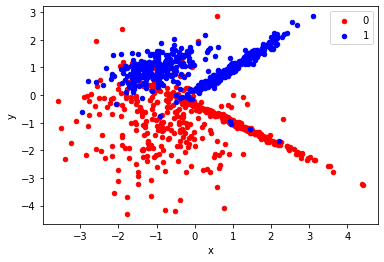

In [3]:
n_features=2
classes  = 2
# generate 2d classification dataset
# X, y = make_classification(n_samples=1000, centers=classes, n_features=n_features, random_state=10)
X, y = make_classification(n_samples=1000, n_features=n_features, n_informative=2, n_redundant=0, n_repeated=0, n_classes=classes, random_state=25)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [4]:
class TwoLayersNet(nn.Module):
    # define nn
    def __init__(self):
        super(TwoLayersNet, self).__init__()
        self.fc1 = nn.Linear(n_features, 2)
        self.fc2 = nn.Linear(2, 10)
        self.fc3 = nn.Linear(10, classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        X = self.fc3(X)
        X = self.softmax(X)

        return X

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3)

# wrap up with Variable in pytorch
train_X = Variable(torch.Tensor(train_X).float())
test_X = Variable(torch.Tensor(test_X).float())
train_y = Variable(torch.Tensor(train_y).long())
test_y = Variable(torch.Tensor(test_y).long())

In [6]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
net = TwoLayersNet()

criterion = nn.CrossEntropyLoss()# cross entropy loss

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [7]:
model_name = 'TwoLayersNet'
now = datetime.now() # current date and time
log_name = '{}_{}'.format(model_name, now.strftime('%Y%m%d_%H%M%S'))
writer = SummaryWriter(model_name+'/logs/{}'.format(log_name))

In [8]:
Losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    out = net(train_X)
    loss = criterion(out, train_y)
    loss.backward()
    optimizer.step()

    # print(loss.data)
    Losses.append(loss.data)
    writer.add_scalar('loss/train', loss.item(), epoch)
    if epoch % 100 == 0:
        print('number of epoch', epoch, 'loss', loss.data)

# print("Losses: ", Losses)
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)

print('prediction accuracy', accuracy_score(test_y.data, predict_y.data))

print('macro precision', precision_score(test_y.data, predict_y.data, average='macro'))
print('micro precision', precision_score(test_y.data, predict_y.data, average='micro'))
print('macro recall', recall_score(test_y.data, predict_y.data, average='macro'))
print('micro recall', recall_score(test_y.data, predict_y.data, average='micro'))

number of epoch 0 loss tensor(0.6989)
number of epoch 100 loss tensor(0.6651)
number of epoch 200 loss tensor(0.6304)
number of epoch 300 loss tensor(0.5947)
number of epoch 400 loss tensor(0.5614)
number of epoch 500 loss tensor(0.5318)
number of epoch 600 loss tensor(0.5067)
number of epoch 700 loss tensor(0.4861)
number of epoch 800 loss tensor(0.4695)
number of epoch 900 loss tensor(0.4561)
prediction accuracy 0.9333333333333333
macro precision 0.9345142243692968
micro precision 0.9333333333333333
macro recall 0.9324252136752137
micro recall 0.9333333333333333


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
net_gpu = TwoLayersNet().to(device)
summary(net_gpu, input_size=(1,2))
print(net_gpu)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 2]               6
            Linear-2                [-1, 1, 10]              30
            Linear-3                 [-1, 1, 2]              22
           Softmax-4                 [-1, 1, 2]               0
Total params: 58
Trainable params: 58
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
TwoLayersNet(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


### Performance Summary for three different models 
- Simple: Single Hidden layer model in orange contains 100 neurons.
- ShallowNet: Single hidden layer model in blue contains 2 neurons
- Two Layers model: Two hidden layers model in red contains 2 and 10 neurons respectively.

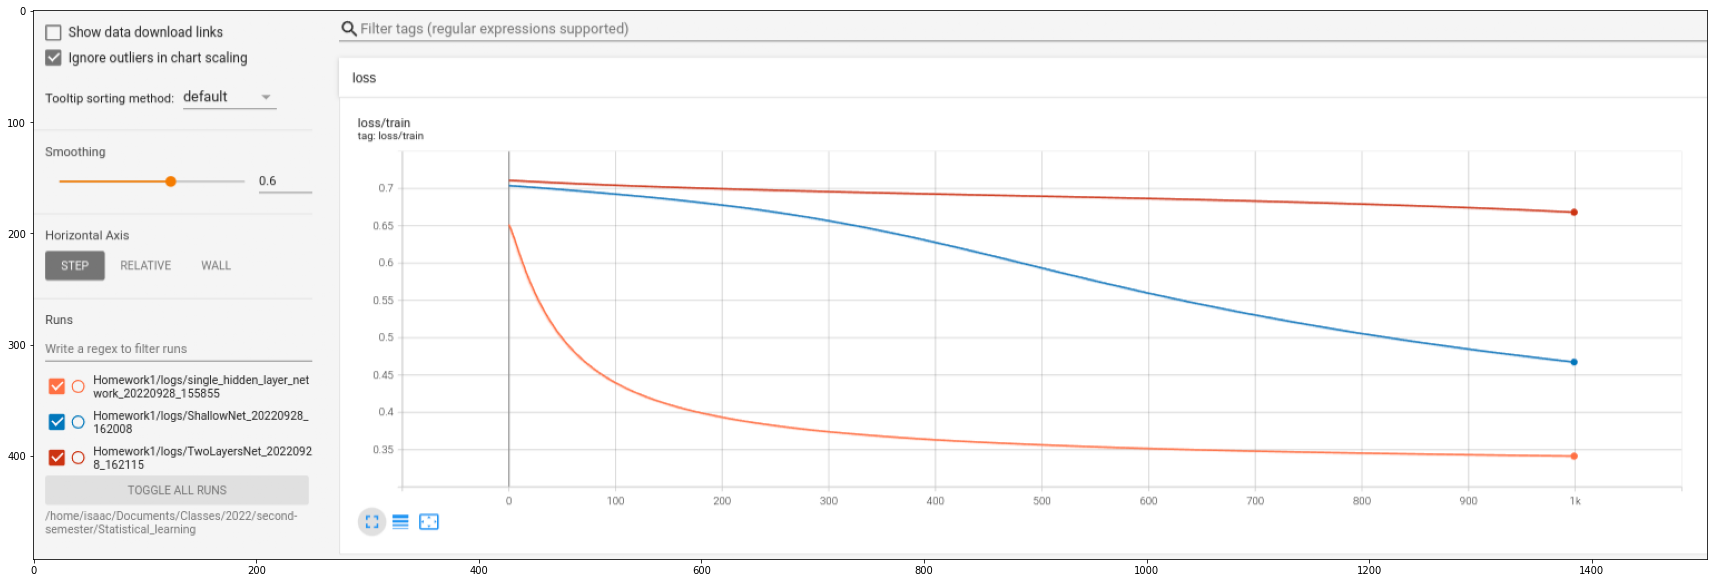

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
img = mpimg.imread('Three_networks_comparisons.png')
imgplot = plt.imshow(img)
plt.show()